In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [79]:
with open('data/1000K/Ge/ground_excited.dat') as inf:
    ge1000 = inf.read()
    
zero = float(ge1000[182:190])/100
one = float(ge1000[230:238])/100
print(zero)
print(one)

0.48576250000000004
0.5142375


In [72]:
with open('data/1000K/Ge/reference_0.dat') as f:
    v_a = f.read()

with open('data/1000K/Ge/reference_1.dat') as f:
    v_b = f.read()

v_tot = (float(v_a[76:79]) + float(v_b[76:79])) / 0.1  / 2
print(v_tot, 'state changes per tetrahedra per ns')

68.49999999999999 state changes per tetrahedra per ns


In [73]:
v0_1 = v_tot * (one / (zero + one))
print(v0_1)

35.22526874999999


In [74]:
v1_0 = v_tot - v0_1

In [75]:
print(v1_0)
print(v0_1)

33.274731249999995
35.22526874999999


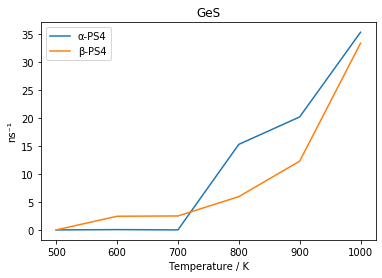

In [27]:
temp = [500, 600, 700, 800, 900, 1000]
chalcogen = ['Ge']
v0_1s = []
v1_0s = []

for i in temp:
    for j in chalcogen:
        with open(f'data/{i}K/{j}/ground_excited.dat') as f:
            data = list(map(lambda l: l.split(" "), f.readlines()))
        zero = float(data[4][6])/100
        one = float(data[5][6])/100
        
        with open(f'data/{i}K/{j}/reference_0.dat') as f:
            v_a = list(map(lambda l: l.split(" "), f.readlines()))
        with open(f'data/{i}K/{j}/reference_1.dat') as f:
            v_b = list(map(lambda l: l.split(" "), f.readlines()))
        v_tot = (float(v_a[2][5]) + float(v_b[2][5])) / 0.1  / 2
        
        v0_1 = v_tot * (one / (zero + one))
        v1_0 = v_tot - v0_1
        
        v0_1s.append(v0_1)
        v1_0s.append(v1_0)

x = temp
y = v0_1s
z = v1_0s

plt.plot(x, y, label='α-PS4')
plt.plot(x, z, label='β-PS4')
plt.legend()
plt.title('GeS')
plt.xlabel('Temperature / K')
plt.ylabel('ns\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}')
plt.savefig('ge_freq.png', dpi=300)

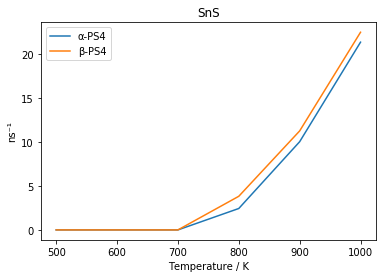

In [26]:
temp = [500, 600, 700, 800, 900, 1000]
chalcogen = ['Sn']
v0_1s = []
v1_0s = []

for i in temp:
    for j in chalcogen:
        with open(f'data/{i}K/{j}/ground_excited.dat') as f:
            data = list(map(lambda l: l.split(" "), f.readlines()))
        zero = float(data[4][6])/100
        one = float(data[5][6])/100
        
        with open(f'data/{i}K/{j}/reference_0.dat') as f:
            v_a = list(map(lambda l: l.split(" "), f.readlines()))
        with open(f'data/{i}K/{j}/reference_1.dat') as f:
            v_b = list(map(lambda l: l.split(" "), f.readlines()))
        v_tot = (float(v_a[2][5]) + float(v_b[2][5])) / 0.1  / 2
        
        v0_1 = v_tot * (one / (zero + one))
        v1_0 = v_tot - v0_1
        
        v0_1s.append(v0_1)
        v1_0s.append(v1_0)

x = temp
y = v0_1s
z = v1_0s

plt.plot(x, y, label='α-PS4')
plt.plot(x, z, label='β-PS4')
plt.legend()
plt.title('SnS')
plt.xlabel('Temperature / K')
plt.ylabel('ns\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}')
plt.savefig('sn_freq.png', dpi=300)

[2.5, 2.5, 21.25, 32.5, 68.75]
-12.691697424199983 16.56853326518914
1.0936858636664077
0.0010936858636663854
-3.8966338944268712 6.953612979607918
0.33578592868846974


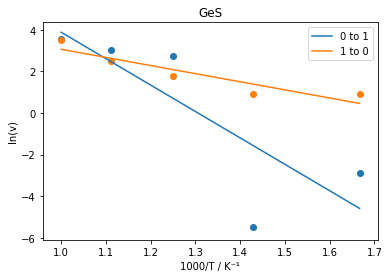

In [5]:
temp = [600, 700, 800, 900, 1000]
chalcogen = ['Ge']
v0_1s = []
v1_0s = []
v_tots = []

for i in temp:
    for j in chalcogen:
        with open(f'data/{i}K/{j}/ground_excited.dat') as f:
            data = list(map(lambda l: l.split(" "), f.readlines()))
        zero = float(data[4][6])/100
        one = float(data[5][6])/100
        
        with open(f'data/{i}K/{j}/reference_0.dat') as f:
            v_a = list(map(lambda l: l.split(" "), f.readlines()))
        with open(f'data/{i}K/{j}/reference_1.dat') as f:
            v_b = list(map(lambda l: l.split(" "), f.readlines()))
        v_tot = (float(v_a[2][5]) + float(v_b[2][5])) / 0.1  / 2
        
        v0_1 = v_tot * (one / (zero + one))
        v1_0 = v_tot - v0_1
        
        v0_1s.append(v0_1)
        v1_0s.append(v1_0)
        v_tots.append(v_tot)


print(v_tots)
        
x = [1000/i for i in temp]
y = [math.log(i) for i in v0_1s]
z = [math.log(i) for i in v1_0s]

(m, b) = np.polyfit(x, y, 1)
print(m, b)
print(-m*8.31446261815324/(6.02214076*(10**23))/(1.602176634*(10**-22)))
print(-m*8.617333262145*(10**-5))

yp = np.polyval([m, b], x)
plt.plot(x, yp, label='0 to 1')

(m, b) = np.polyfit(x, z, 1)
print(m, b)
print(-m*8.31446261815324/(6.02214076*(10**23))/(1.602176634*(10**-22)))

zp = np.polyval([m, b], x)
plt.plot(x, zp, label='1 to 0')

plt.legend()
plt.title('GeS')
plt.xlabel('1000/T / K\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}')
plt.ylabel('ln(v)')
plt.scatter(x,y)
plt.scatter(x,z)
plt.savefig('arrhenius_GeS.png', dpi=300)

[6.25, 21.25, 43.75]
-8.744175811434527 11.880622024297086
0.7535147706992005
-7.112249621871767 10.25828985155528
0.6128862523523503


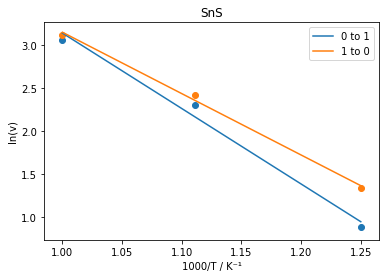

In [25]:
temp = [800, 900, 1000]
chalcogen = ['Sn']
v0_1s = []
v1_0s = []
v_tots = []

for i in temp:
    for j in chalcogen:
        with open(f'data/{i}K/{j}/ground_excited.dat') as f:
            data = list(map(lambda l: l.split(" "), f.readlines()))
        zero = float(data[4][6])/100
        one = float(data[5][6])/100
        
        with open(f'data/{i}K/{j}/reference_0.dat') as f:
            v_a = list(map(lambda l: l.split(" "), f.readlines()))
        with open(f'data/{i}K/{j}/reference_1.dat') as f:
            v_b = list(map(lambda l: l.split(" "), f.readlines()))
        v_tot = (float(v_a[2][5]) + float(v_b[2][5])) / 0.1  / 2
        
        v0_1 = v_tot * (one / (zero + one))
        v1_0 = v_tot - v0_1
        
        v0_1s.append(v0_1)
        v1_0s.append(v1_0)
        v_tots.append(v_tot)
        
x = [1000/i for i in temp]
y = [math.log(i) for i in v0_1s]
z = [math.log(i) for i in v1_0s]

print(v_tots)
        
x = [1000/i for i in temp]
y = [math.log(i) for i in v0_1s]
z = [math.log(i) for i in v1_0s]

(m, b) = np.polyfit(x, y, 1)
print(m, b)
print(-m*8.31446261815324/(6.02214076*(10**23))/(1.602176634*(10**-22)))

yp = np.polyval([m, b], x)
plt.plot(x, yp, label='0 to 1')

(m, b) = np.polyfit(x, z, 1)
print(m, b)
print(-m*8.31446261815324/(6.02214076*(10**23))/(1.602176634*(10**-22)))

zp = np.polyval([m, b], x)
plt.plot(x, zp, label='1 to 0')

plt.legend()
plt.title('SnS')
plt.xlabel('1000/T / K\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}')
plt.ylabel('ln(v)')
plt.scatter(x,y)
plt.scatter(x,z)
plt.savefig('arrhenius_SnS.png', dpi=300)

1.9999999999999993 2.2204460492503135e-15


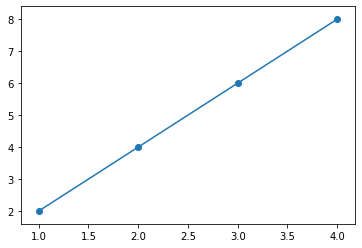

In [21]:
x = [1,2,3,4]
y = [2,4,6,8]

(m, b) = np.polyfit(x, y, 1)
print(m, b)

yp = np.polyval([m, b], x)
plt.plot(x, yp)

plt.scatter(x,y)